In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('all.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [47]:
data = happines_data[['GDP per capita','Healthy life expectancy']]

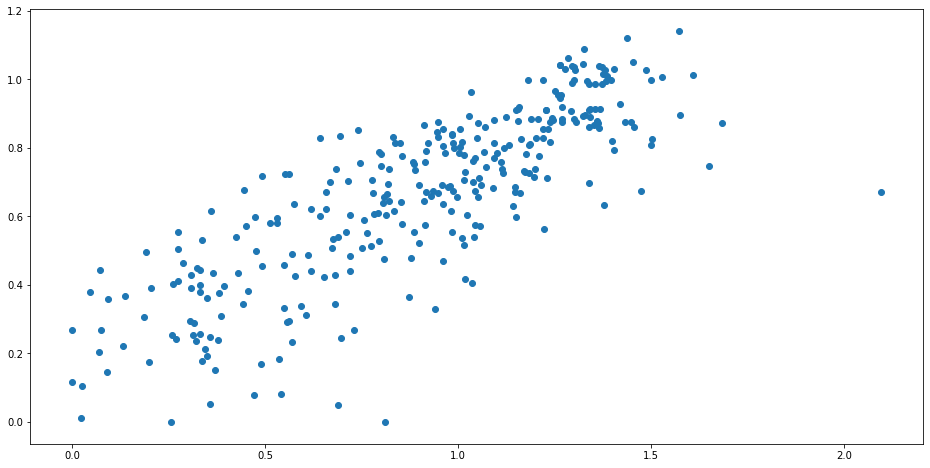

In [48]:
plt.figure(figsize=(16, 8))

plt.scatter(data['GDP per capita'], data['Healthy life expectancy'])

In [107]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5, init='random', n_init=20, max_iter=500, n_jobs=-1, random_state=520)
k_means.fit(data)

k_means.score(data)

-8.331364380633294

In [108]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'random',
 'max_iter': 500,
 'n_clusters': 5,
 'n_init': 20,
 'n_jobs': -1,
 'precompute_distances': 'auto',
 'random_state': 520,
 'tol': 0.0001,
 'verbose': 0}

In [109]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, k_means.labels_)
print("Score: ", score)

Score:  0.40402647273328207


In [110]:
centers = k_means.cluster_centers_
centers

array([[0.71433962, 0.63501887],
       [1.03163158, 0.73162105],
       [0.25768627, 0.31688235],
       [0.61172414, 0.31644828],
       [1.35145238, 0.9265    ]])

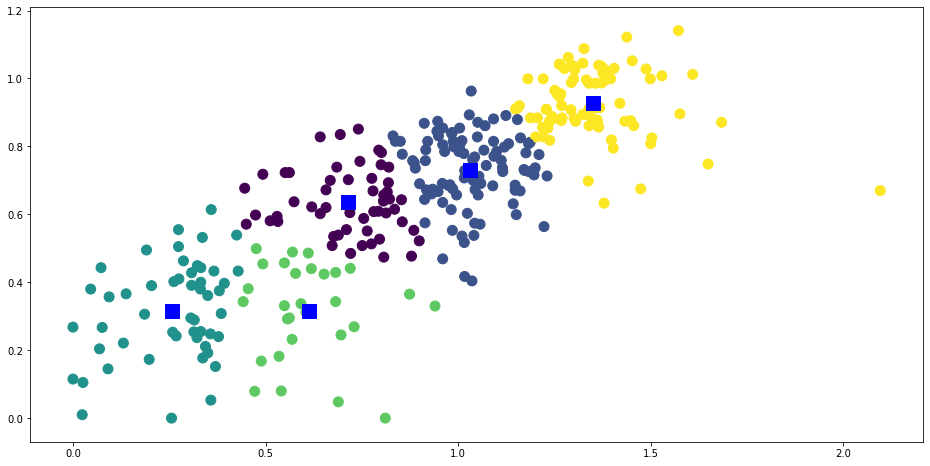

In [111]:
plt.figure(figsize=(16, 8))

plt.scatter(data['GDP per capita'], data['Healthy life expectancy'], c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

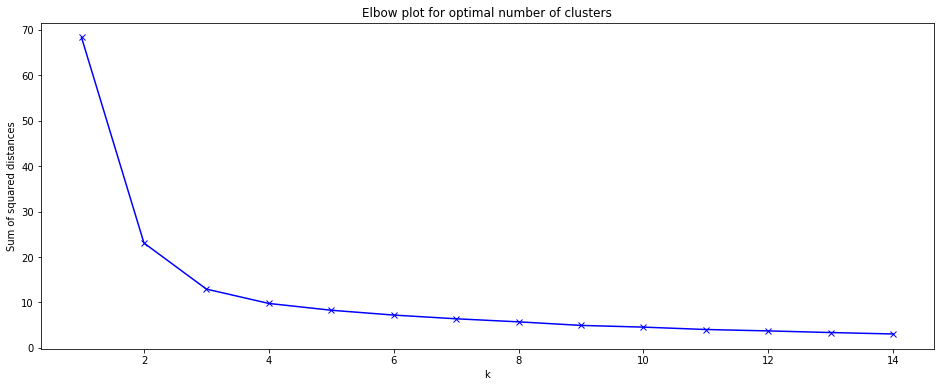

In [94]:
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data)

    sum_of_squared_distances.append(k_means.inertia_)

plt.figure(figsize=(16, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow plot for optimal number of clusters')

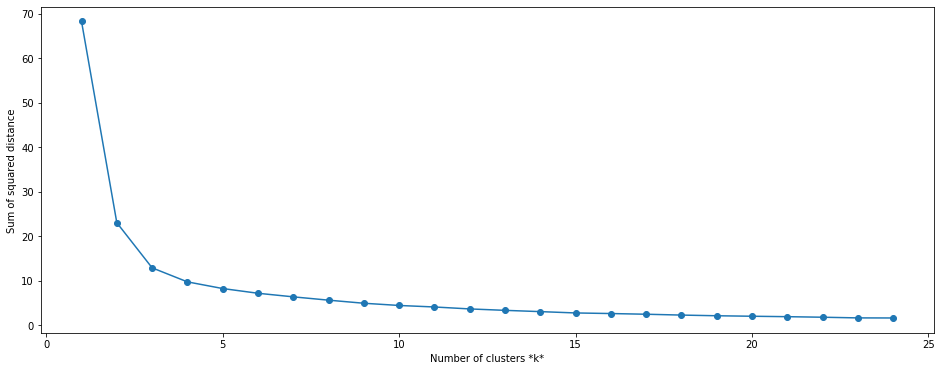

In [87]:
sse = []
list_k = list(range(1, 25))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    
    sse.append(km.inertia_)

plt.figure(figsize=(16, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

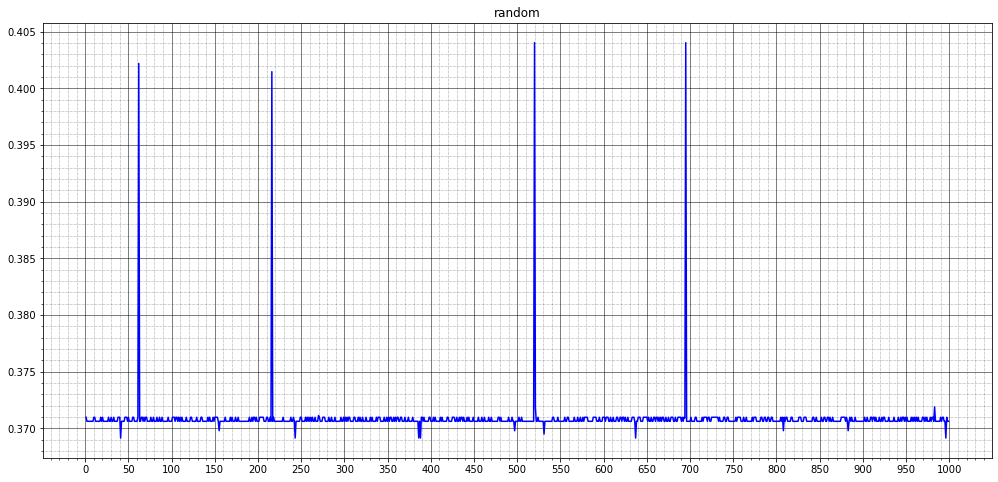

In [105]:
random = np.arange(1, 1000, 1)
results = []

for feature in random:
    rf = KMeans(n_clusters=5, init='random', n_init=20, max_iter=500, random_state=feature)
    rf.fit(data)
        
    results.append(silhouette_score(data, rf.labels_))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(random, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('random')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))

In [106]:
print(results[results.index(max(results))])
print(random[results.index(max(results))])

0.40402647273328207
520
